In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# Now, we will load the data set and look at some initial rows and data types of the columns:
data = pd.read_csv('TCS_New.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

          Dte        Close
0  15-12-2014  1179.319946
1  16-12-2014  1221.530029
2  17-12-2014  1222.050049
3  18-12-2014  1230.349976
4  19-12-2014  1255.280029

 Data Types:
Dte       object
Close    float64
dtype: object


In [3]:
# The data contains a particular month and number of passengers travelling in that month.
#In order to read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv('TCS_New.csv', index_col='Dte',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())


 Parsed Data:
                  Close
Dte                    
2014-12-15  1179.319946
2014-12-16  1221.530029
2014-12-17  1222.050049
2014-12-18  1230.349976
2014-12-19  1255.280029


In [4]:
data.index

DatetimeIndex(['2014-12-15', '2014-12-16', '2014-12-17', '2014-12-18',
               '2014-12-19', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-26', '2014-12-29',
               ...
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13'],
              dtype='datetime64[ns]', name='Dte', length=1231, freq=None)

In [5]:
ts = data['Close'] 
ts.head(10)

Dte
2014-12-15    1179.319946
2014-12-16    1221.530029
2014-12-17    1222.050049
2014-12-18    1230.349976
2014-12-19    1255.280029
2014-12-22    1256.699951
2014-12-23    1258.349976
2014-12-24    1239.949951
2014-12-26    1252.500000
2014-12-29    1261.449951
Name: Close, dtype: float64

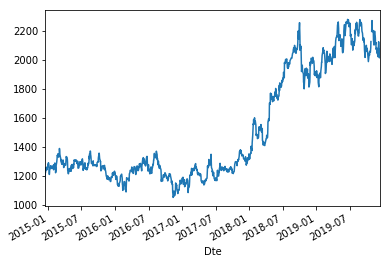

In [6]:
ts.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
data.isna().sum()

Close    2
dtype: int64

In [9]:
data['Close'].value_counts()

1261.449951    3
1256.900024    3
1278.000000    2
1275.550049    2
1205.849976    2
1265.030029    2
1253.030029    2
1274.349976    2
1251.030029    2
1244.719971    2
1255.380005    2
2079.300049    2
1163.530029    2
1181.180054    2
2252.800049    2
1236.699951    2
2005.650024    2
1251.800049    2
1257.400024    2
1223.199951    2
1316.650024    2
2070.750000    2
1199.050049    2
1140.699951    2
2022.800049    2
1243.650024    2
1247.500000    2
1234.699951    2
1307.619995    2
1279.119995    2
              ..
1498.619995    1
1477.530029    1
1283.569946    1
1328.150024    1
1269.880005    1
1162.750000    1
1263.619995    1
1551.000000    1
1352.380005    1
1518.849976    1
1996.599976    1
1744.650024    1
1122.300049    1
1164.449951    1
1241.030029    1
1735.119995    1
1222.680054    1
1289.199951    1
1266.319946    1
1157.680054    1
1254.800049    1
1870.150024    1
2196.800049    1
2070.100098    1
1354.119995    1
1261.699951    1
1787.550049    1
2195.000000   

In [10]:
data['Close'].max()

2277.949951

In [11]:
data['Close'].min()

1050.569946

In [12]:
data['Close'].fillna(2000,inplace=True)

In [13]:
data.isna().sum()

Close    0
dtype: int64

In [14]:
def test_stationarity_using_rolling_mean(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

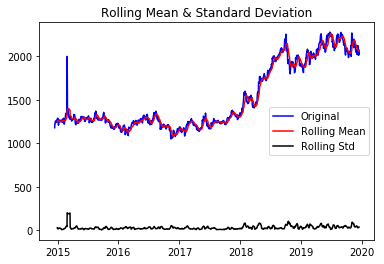

In [15]:
test_stationarity_using_rolling_mean(ts)

In [16]:
def test_stationarity_using_df_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    #print(dftest)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [17]:
test_stationarity_using_df_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -0.693069
p-value                           0.848537
Lags Used                         3.000000
Number of Observations Used    1227.000000
Critical Value (1%)              -3.435691
Critical Value (5%)              -2.863898
Critical Value (10%)             -2.568026
dtype: float64


<h1> Estimating & Eliminating Trend </h2>

Dte
2014-12-15    7.072693
2014-12-16    7.107859
2014-12-17    7.108285
2014-12-18    7.115054
2014-12-19    7.135114
2014-12-22    7.136244
2014-12-23    7.137557
2014-12-24    7.122826
2014-12-26    7.132897
2014-12-29    7.140017
2014-12-30    7.142851
2014-12-31    7.153928
2015-01-01    7.148959
2015-01-02    7.162180
2015-01-05    7.146867
2015-01-06    7.109307
2015-01-07    7.097425
2015-01-08    7.108162
2015-01-09    7.135807
2015-01-12    7.134771
2015-01-13    7.130058
2015-01-14    7.139637
2015-01-15    7.146418
2015-01-16    7.143673
2015-01-19    7.135289
2015-01-20    7.131075
2015-01-21    7.136404
2015-01-22    7.136308
2015-01-23    7.132338
2015-01-27    7.131723
                ...   
2019-11-01    7.696622
2019-11-04    7.693459
2019-11-05    7.697053
2019-11-06    7.690972
2019-11-07    7.689531
2019-11-08    7.663854
2019-11-11    7.650145
2019-11-13    7.686438
2019-11-14    7.694757
2019-11-15    7.684531
2019-11-18    7.674432
2019-11-19    7.653874
2019-11

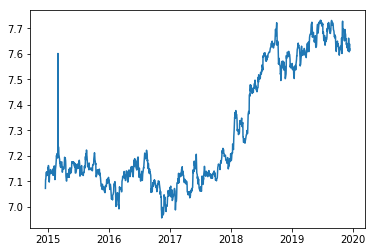

In [18]:
ts_log = np.log(ts)
print(ts_log)
plt.plot(ts_log)

<h1> Moving Average </h1>

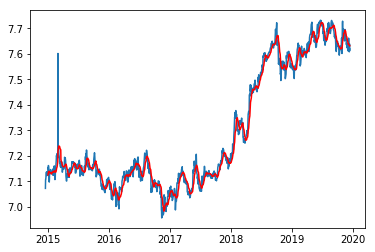

In [19]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(14)

Dte
2014-12-15         NaN
2014-12-16         NaN
2014-12-17         NaN
2014-12-18         NaN
2014-12-19         NaN
2014-12-22         NaN
2014-12-23         NaN
2014-12-24         NaN
2014-12-26         NaN
2014-12-29         NaN
2014-12-30         NaN
2014-12-31    0.028484
2015-01-01    0.017160
2015-01-02    0.025854
Name: Close, dtype: float64

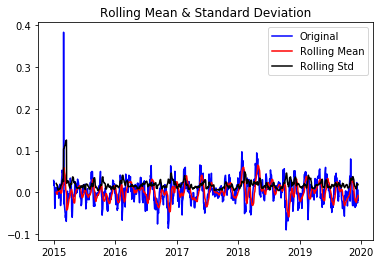

None
Results of Dickey-Fuller Test:
Test Statistic                -1.058302e+01
p-value                        6.828230e-19
Lags Used                      8.000000e+00
Number of Observations Used    1.211000e+03
Critical Value (1%)           -3.435761e+00
Critical Value (5%)           -2.863930e+00
Critical Value (10%)          -2.568042e+00
dtype: float64


In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
print(test_stationarity_using_rolling_mean(ts_log_moving_avg_diff))
test_stationarity_using_df_test(ts_log_moving_avg_diff)

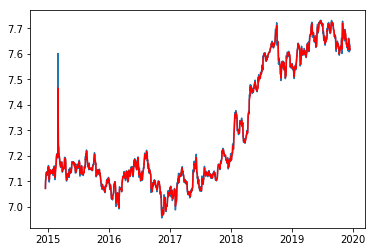

In [22]:
expwighted_avg = ts_log.ewm(com=0.5).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

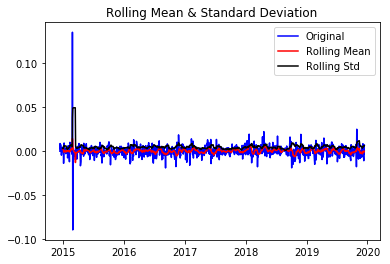

None
Results of Dickey-Fuller Test:
Test Statistic                  -34.488603
p-value                           0.000000
Lags Used                         0.000000
Number of Observations Used    1230.000000
Critical Value (1%)              -3.435678
Critical Value (5%)              -2.863893
Critical Value (10%)             -2.568023
dtype: float64


In [23]:
ts_log_ewma_diff = ts_log - expwighted_avg
print(test_stationarity_using_rolling_mean(ts_log_ewma_diff))
test_stationarity_using_df_test(ts_log_ewma_diff)

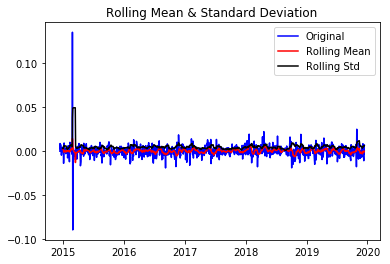

None
Results of Dickey-Fuller Test:
Test Statistic                  -34.488603
p-value                           0.000000
Lags Used                         0.000000
Number of Observations Used    1230.000000
Critical Value (1%)              -3.435678
Critical Value (5%)              -2.863893
Critical Value (10%)             -2.568023
dtype: float64


In [24]:
ts_log_ewma_diff.dropna(inplace=True)
print(test_stationarity_using_rolling_mean(ts_log_ewma_diff))
test_stationarity_using_df_test(ts_log_ewma_diff)

<h1> Eliminating Trend and Seasonality </h1>

Dte
2014-12-15         NaN
2014-12-16    0.035166
2014-12-17    0.000426
2014-12-18    0.006769
2014-12-19    0.020060
2014-12-22    0.001131
2014-12-23    0.001312
2014-12-24   -0.014730
2014-12-26    0.010071
2014-12-29    0.007120
2014-12-30    0.002834
2014-12-31    0.011076
2015-01-01   -0.004969
2015-01-02    0.013222
2015-01-05   -0.015314
2015-01-06   -0.037559
2015-01-07   -0.011883
2015-01-08    0.010738
2015-01-09    0.027644
2015-01-12   -0.001035
2015-01-13   -0.004713
2015-01-14    0.009578
2015-01-15    0.006781
2015-01-16   -0.002745
2015-01-19   -0.008384
2015-01-20   -0.004214
2015-01-21    0.005329
2015-01-22   -0.000095
2015-01-23   -0.003970
2015-01-27   -0.000615
                ...   
2019-11-01   -0.030759
2019-11-04   -0.003163
2019-11-05    0.003594
2019-11-06   -0.006082
2019-11-07   -0.001440
2019-11-08   -0.025678
2019-11-11   -0.013709
2019-11-13    0.036293
2019-11-14    0.008319
2019-11-15   -0.010226
2019-11-18   -0.010099
2019-11-19   -0.020557
2019-11

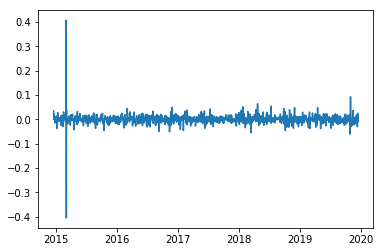

In [25]:
ts_log_diff = ts_log - ts_log.shift()
print(ts_log_diff)
plt.plot(ts_log_diff)

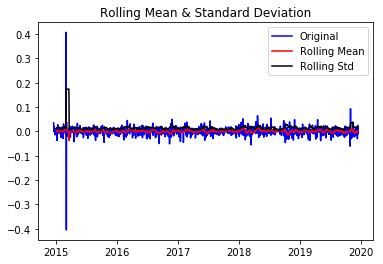

None
Results of Dickey-Fuller Test:
Test Statistic                  -30.387094
p-value                           0.000000
Lags Used                         1.000000
Number of Observations Used    1228.000000
Critical Value (1%)              -3.435686
Critical Value (5%)              -2.863896
Critical Value (10%)             -2.568025
dtype: float64


In [26]:
ts_log_diff.dropna(inplace=True)
print(test_stationarity_using_rolling_mean(ts_log_diff))
test_stationarity_using_df_test(ts_log_diff)

<h2> Decomposing </h2>

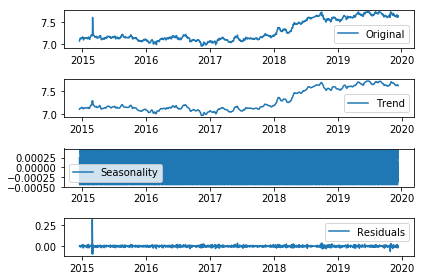

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

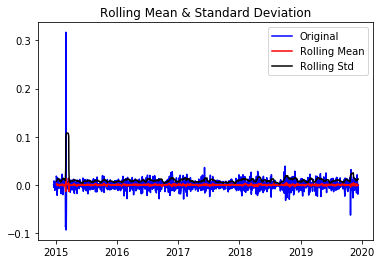

None
Results of Dickey-Fuller Test:
Test Statistic                -1.241796e+01
p-value                        4.199091e-23
Lags Used                      2.300000e+01
Number of Observations Used    1.203000e+03
Critical Value (1%)           -3.435797e+00
Critical Value (5%)           -2.863946e+00
Critical Value (10%)          -2.568051e+00
dtype: float64


In [28]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
print(test_stationarity_using_rolling_mean(ts_log_decompose))
test_stationarity_using_df_test(ts_log_decompose)

<h2> Forecasting a Time Series </h2>

In [29]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [30]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

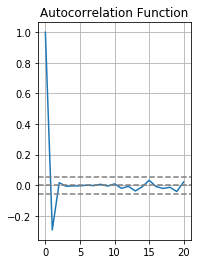

In [31]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()

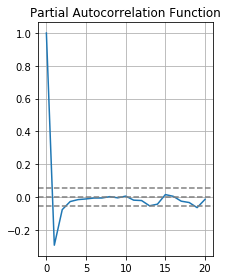

In [32]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.grid(True)
plt.show()

<h2> ARIMA Model </h2>

In [33]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.5340')

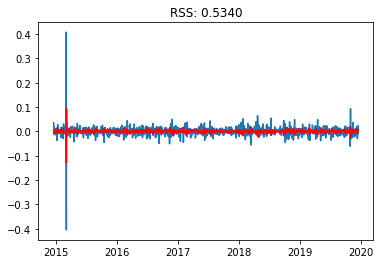

In [34]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

<h1>Taking back to Original Scale </h1>

In [35]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Dte
2014-12-16    0.000444
2014-12-17   -0.009716
2014-12-18   -0.002286
2014-12-19   -0.002576
2014-12-22   -0.006445
dtype: float64


In [36]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Dte
2014-12-16    0.000444
2014-12-17   -0.009272
2014-12-18   -0.011558
2014-12-19   -0.014134
2014-12-22   -0.020579
dtype: float64


In [37]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Dte
2014-12-15    7.072693
2014-12-16    7.073137
2014-12-17    7.063421
2014-12-18    7.061135
2014-12-19    7.058560
dtype: float64

Text(0.5, 1.0, 'RMSE: 317.1904')

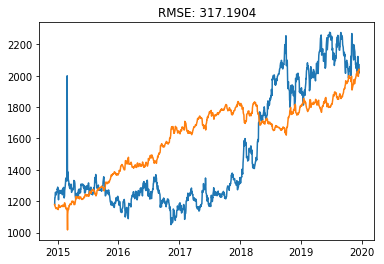

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [48]:
print(predictions_ARIMA[-5:])

Dte
2019-12-09    1996.397712
2019-12-10    2014.485820
2019-12-11    2036.641077
2019-12-12    2033.783592
2019-12-13    2041.688078
dtype: float64


In [46]:
print(results_ARIMA)

In [39]:
ts_log.head()

Dte
2014-12-15    7.072693
2014-12-16    7.107859
2014-12-17    7.108285
2014-12-18    7.115054
2014-12-19    7.135114
Name: Close, dtype: float64

C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: Length of passed values is 791, index implies 2

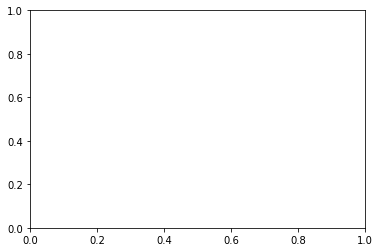

In [49]:
results_ARIMA.plot_predict(start=2020,end=2021)

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

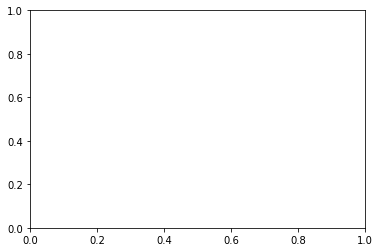

In [41]:
results_ARIMA.plot_predict('2020','2021',dynamic=True, plot_insample=False)

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

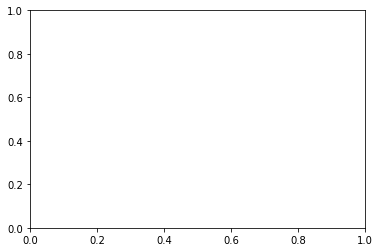

In [43]:
results_ARIMA.plot_predict('2020-01-01', '2021-01-01')

C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Karthik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: Length of passed values is 789, index implies 2

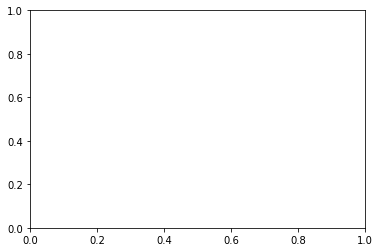

In [44]:
results_ARIMA.plot_predict(2020-1-1, 2021-1-1)

In [ ]:
results_ARIMA.plot_predict(2020, 2021)